# HM1: Logistic Regression.

### Name: Siddharth Harsukh Pansuria
### CWID: 20005837

#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also you should plot their objective values versus epochs and compare their training and testing accuracies. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [268]:
# Load Packages
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [269]:
# Load the data as dataframe
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## 1.2 Examine and clean data

In [270]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.
df.drop(df.columns[[0, 32]], axis = 1, inplace = True) # Dropping unnecessary columns
df["diagnosis"].replace({"M": -1, "B": 1}, inplace = True) # Replacing M with -1 and B with 1
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,-1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,-1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,-1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 1.3. Partition to training and testing sets

In [271]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machine learning.
X, y = np.asarray(df.iloc[:,1:]), np.asarray(df.iloc[:,0:1]) # Seperating features and target columns
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # Test train split

## 1.4. Feature scaling

Use the standardization to trainsform both training and test features

In [272]:
# Standardization
import numpy

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train, axis=0).reshape(1, d)
sig = numpy.std(x_train, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('test std = ')
print(numpy.std(x_test, axis=0))

test mean = 
[ 0.0128982   0.09619309  0.02153908  0.0062616  -0.00284483  0.1218092
  0.11497821  0.04729724  0.08677152  0.0381384  -0.03422155 -0.02598006
 -0.01661957 -0.00142957 -0.09457139  0.04550315  0.16609029  0.06389974
 -0.11113464  0.06461517  0.0214923   0.14296148  0.03052313  0.01442689
  0.10185983  0.19346888  0.22484819  0.14075701  0.17558728  0.16539207]
test std = 
[0.96739005 1.00854412 0.971261   1.02119096 0.86177632 1.07236923
 1.04034312 1.01726579 0.99969559 1.02281423 1.10076206 0.96060541
 1.09820197 1.30299171 0.74997806 0.92747851 1.48905298 1.12928124
 0.77970096 1.33413419 0.98381813 0.97875956 0.9854047  1.04693985
 0.97307143 1.10571111 1.06387424 1.03224208 1.0831142  1.08729588]


# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistric regression and when $\lambda > 0$, it essentially becomes a regularized logistric regression.

In [273]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
def objective(w, x, y, lam):

  yxw = np.dot(np.multiply(y,x),w)
  expTerm = np.exp(-yxw)
  
  firstObj = np.mean(np.log(1 + expTerm))
  secondObj = (lam / 2) * np.sum(w * w)
  
  objval = firstObj + secondObj
  
  return objval

  pass

# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [274]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):

  yx = np.multiply(y, x)
  expTerm = np.exp(np.dot(yx, w))
  
  firstG = -np.mean(np.divide(yx, 1 + expTerm),axis = 0).reshape(d,1)
  secondG = lam * w
  
  g = firstG + secondG
  
  return g
  
  pass

In [275]:
# Gradient descent for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
  
  objvals = np.zeros(max_epoch) # making an array to store objective values

  for i in range(0,max_epoch) :

    currentObjectiveValue = objective(w, x, y, lam) 
    currentGradient = gradient(w, x, y, lam)

    w -= learning_rate  * currentGradient # updating weight

    objvals[i] = currentObjectiveValue 

    print(f'Iteration number: {i+1} Current Objective Value: {objvals[i]}')

  return w, objvals
  
  pass

Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [276]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0
learning_rate = 1
w = np.zeros((d,1))
w_gd, objvals_gd = gradient_descent(x_train, y_train, lam, learning_rate, w)

Iteration number: 1 Current Objective Value: 0.6931471805599453
Iteration number: 2 Current Objective Value: 0.15921984932770258
Iteration number: 3 Current Objective Value: 0.13025952789414766
Iteration number: 4 Current Objective Value: 0.11528716422134247
Iteration number: 5 Current Objective Value: 0.10668482073983347
Iteration number: 6 Current Objective Value: 0.10099807261569023
Iteration number: 7 Current Objective Value: 0.0967092352354366
Iteration number: 8 Current Objective Value: 0.09320439824261602
Iteration number: 9 Current Objective Value: 0.09021615517602312
Iteration number: 10 Current Objective Value: 0.08760692413077088
Iteration number: 11 Current Objective Value: 0.08529379620816697
Iteration number: 12 Current Objective Value: 0.08322076253267549
Iteration number: 13 Current Objective Value: 0.08134708671403236
Iteration number: 14 Current Objective Value: 0.07964172010100179
Iteration number: 15 Current Objective Value: 0.0780802575256351
Iteration number: 16 C

In [277]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.000001
learning_rate = 1
w = np.zeros((d,1))
w_gd_r, objvals_gdr = gradient_descent(x_train, y_train, lam, learning_rate, w)

Iteration number: 1 Current Objective Value: 0.6931471805599453
Iteration number: 2 Current Objective Value: 0.15922088009733043
Iteration number: 3 Current Objective Value: 0.1302606513432094
Iteration number: 4 Current Objective Value: 0.11528843378033288
Iteration number: 5 Current Objective Value: 0.1066862470757165
Iteration number: 6 Current Objective Value: 0.10099964706741345
Iteration number: 7 Current Objective Value: 0.09671094652844654
Iteration number: 8 Current Objective Value: 0.09320623715306418
Iteration number: 9 Current Objective Value: 0.09021811445924562
Iteration number: 10 Current Objective Value: 0.08760899793588407
Iteration number: 11 Current Objective Value: 0.0852959796503934
Iteration number: 12 Current Objective Value: 0.08322305142165068
Iteration number: 13 Current Objective Value: 0.08134947738095714
Iteration number: 14 Current Objective Value: 0.07964420928468809
Iteration number: 15 Current Objective Value: 0.07808284229396174
Iteration number: 16 Cu

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [278]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
  
  yixi = yi * xi
  yixiw = float(np.dot(yixi,w))
  
  firstObj = np.log(1 + np.exp(-yixiw))
  secondObj = (lam / 2) * np.sum(w * w)
  
  obj = firstObj + secondObj
  
  firstG = -yixi.T/(1 + np.exp(yixiw))
  secondG = lam * w
  
  g = firstG + secondG
  return obj, g
  
  pass

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [279]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w, max_epoch=100):

  n = x.shape[0]
  objvals = np.zeros(max_epoch)

  for i in range(0, max_epoch):

    # shuffling 
    randomIndices = np.random.permutation(n)
    x_random, y_random = x[randomIndices, :], y[randomIndices, :]

    currentObjValue = 0
    for j in range(0,n):
      xi, yi = x_random[j, :].reshape(1,d), float(y_random[j, :])
      currObj, g = stochastic_objective_gradient(w, xi, yi, lam)
      w -= learning_rate * g # update weights
      currentObjValue += currObj
    
    learning_rate *= 0.95
    currentObjValue /= n
    objvals[i] = currentObjValue
    print(f'Iteration number: {i+1} Current Objective Value: {objvals[i]}')

  return w, objvals

  pass

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [280]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0
learning_rate = 1
w = np.zeros((d,1))
w_sgd, objvals_sgd = sgd(x_train, y_train, lam, learning_rate, w)

Iteration number: 1 Current Objective Value: 0.22150518484811352
Iteration number: 2 Current Objective Value: 0.38254717271398325
Iteration number: 3 Current Objective Value: 0.3485947125644403
Iteration number: 4 Current Objective Value: 0.14141274882783347
Iteration number: 5 Current Objective Value: 0.1498623066125381
Iteration number: 6 Current Objective Value: 0.1590234991325371
Iteration number: 7 Current Objective Value: 0.16310772112875233
Iteration number: 8 Current Objective Value: 0.09170321249725709
Iteration number: 9 Current Objective Value: 0.2629114317191411
Iteration number: 10 Current Objective Value: 0.10321917571166685
Iteration number: 11 Current Objective Value: 0.07902071575365872
Iteration number: 12 Current Objective Value: 0.0656712284684685
Iteration number: 13 Current Objective Value: 0.07752595671838158
Iteration number: 14 Current Objective Value: 0.05882552247158761
Iteration number: 15 Current Objective Value: 0.04710488744988399
Iteration number: 16 Cur

In [281]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.000001
learning_rate = 1
w = np.zeros((x_train.shape[1],1))
w_sgd_r, objvals_sgdr = sgd(x_train, y_train, lam, learning_rate, w)

Iteration number: 1 Current Objective Value: 0.22535028746919758
Iteration number: 2 Current Objective Value: 0.1685584519594464
Iteration number: 3 Current Objective Value: 0.2513660599343902
Iteration number: 4 Current Objective Value: 0.22536506061971814
Iteration number: 5 Current Objective Value: 0.1956332201283321
Iteration number: 6 Current Objective Value: 0.1783203179653239
Iteration number: 7 Current Objective Value: 0.11214969310945126
Iteration number: 8 Current Objective Value: 0.13802779846227578
Iteration number: 9 Current Objective Value: 0.09364153047603536
Iteration number: 10 Current Objective Value: 0.07484995045540913
Iteration number: 11 Current Objective Value: 0.13630157719505223
Iteration number: 12 Current Objective Value: 0.1746075498124296
Iteration number: 13 Current Objective Value: 0.1131554014412709
Iteration number: 14 Current Objective Value: 0.09063116568993654
Iteration number: 15 Current Objective Value: 0.04714330669353583
Iteration number: 16 Curr

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [282]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):

  yixi = np.multiply(yi, xi)
  yixiw = np.dot(yixi, w)
  
  firstObj = np.mean(np.log(1 + np.exp(-yixiw)))
  secondObj = (lam/2) * np.sum(w * w)
  
  obj = firstObj + secondObj
  
  firstG = np.mean(np.divide(-yixi, 1 + np.exp(yixiw)), axis = 0).reshape(d,1)
  secondG = lam * w
  
  g = firstG + secondG
  
  return obj, g
  
  pass

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [283]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, max_epoch=100):

  objvals = np.zeros(max_epoch)
  batchSize = 10
  n = x.shape[0]

  for i in range(max_epoch) :
    
    randomIndices = np.random.permutation(n)
    x_random, y_random = x[randomIndices, : ], y [randomIndices, : ]
    
    currentObjValue = 0
    for j in range(0, n, batchSize):
      xi, yi = x_random[j : j + batchSize, :], y_random[j : j + batchSize, :]
      currObj, g = mb_objective_gradient(w, xi, yi, lam)
      currentObjValue += currObj
      w -= learning_rate * g

    learning_rate *= 0.95
    currentObjValue /= (n/batchSize)
    objvals[i] = currentObjValue
    print(f'Iteration number: {i+1} Current Objective Value: {objvals[i]}')

  
  return w, objvals
  pass

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [284]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0
learning_rate = 1
w = np.zeros((x_train.shape[1],1))
w_mbgd, objvals_mbgd = mbgd(x_train, y_train, lam, learning_rate, w)

Iteration number: 1 Current Objective Value: 0.10559619814194841
Iteration number: 2 Current Objective Value: 0.05774032268790222
Iteration number: 3 Current Objective Value: 0.0478817478554882
Iteration number: 4 Current Objective Value: 0.049866984307217595
Iteration number: 5 Current Objective Value: 0.0442099395307481
Iteration number: 6 Current Objective Value: 0.04110669279872025
Iteration number: 7 Current Objective Value: 0.038179244887215594
Iteration number: 8 Current Objective Value: 0.03748770473663607
Iteration number: 9 Current Objective Value: 0.036536233276370796
Iteration number: 10 Current Objective Value: 0.03601660547780158
Iteration number: 11 Current Objective Value: 0.0342176949398835
Iteration number: 12 Current Objective Value: 0.04030353866080866
Iteration number: 13 Current Objective Value: 0.03506180266246743
Iteration number: 14 Current Objective Value: 0.03313626738677448
Iteration number: 15 Current Objective Value: 0.037961620517097616
Iteration number: 

In [285]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.000001
learning_rate = 1
w = np.zeros((x_train.shape[1],1))
w_mbgd_r, objvals_mbgdr = mbgd(x_train, y_train, lam, learning_rate, w)

Iteration number: 1 Current Objective Value: 0.11019934634087272
Iteration number: 2 Current Objective Value: 0.060458974791153225
Iteration number: 3 Current Objective Value: 0.05104932709148299
Iteration number: 4 Current Objective Value: 0.04611036363048694
Iteration number: 5 Current Objective Value: 0.04413043145607371
Iteration number: 6 Current Objective Value: 0.041434520855240554
Iteration number: 7 Current Objective Value: 0.04010643019298456
Iteration number: 8 Current Objective Value: 0.040944312828033125
Iteration number: 9 Current Objective Value: 0.039187791885112636
Iteration number: 10 Current Objective Value: 0.03516103199959138
Iteration number: 11 Current Objective Value: 0.035585192717827924
Iteration number: 12 Current Objective Value: 0.034002065553226
Iteration number: 13 Current Objective Value: 0.033435951994100266
Iteration number: 14 Current Objective Value: 0.03353642801317132
Iteration number: 15 Current Objective Value: 0.03523312417425682
Iteration numbe

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

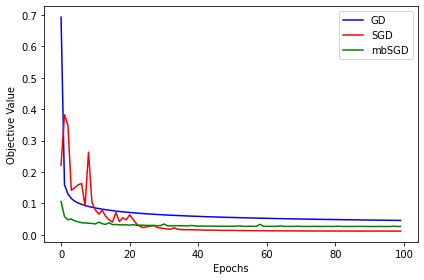

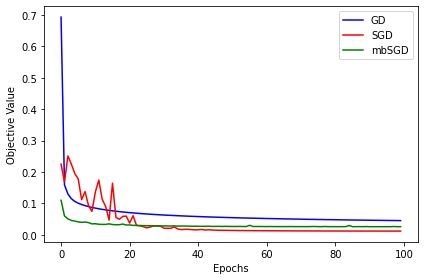

In [297]:
import matplotlib.pyplot as plt
%matplotlib inline

max_epoch = 100

line0, = plt.plot(range(0,max_epoch), objvals_gd, '-b')
line1, = plt.plot(range(0,max_epoch), objvals_sgd, '-r')
line2, = plt.plot(range(0,max_epoch), objvals_mbgd, '-g')

plt.ylabel('Objective Value', FontSize=10)
plt.xlabel('Epochs', FontSize=10)
plt.yticks(FontSize=10)
plt.xticks(FontSize=10)
plt.legend([line0, line1, line2], ['GD', 'SGD', 'mbSGD'], fontsize=10)
plt.tight_layout()
plt.show()

line0, = plt.plot(range(0,max_epoch), objvals_gdr, '-b')
line1, = plt.plot(range(0,max_epoch), objvals_sgdr, '-r')
line2, = plt.plot(range(0,max_epoch), objvals_mbgdr, '-g')

plt.ylabel('Objective Value', FontSize=10)
plt.xlabel('Epochs', FontSize=10)
plt.yticks(FontSize=10)
plt.xticks(FontSize=10)
plt.legend([line0, line1, line2], ['GD', 'SGD', 'mbSGD'], fontsize=10)
plt.tight_layout()
plt.show()

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [298]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
  f = np.sign(np.dot(X,w))
  return np.asarray(f)
  pass

In [299]:
# evaluate training error of logistric regression and regularized version

# for gd
f_train_gd = predict(w_gd, x_train)
diff = numpy.abs(f_train_gd - y_train) / 2
error_train_gd = numpy.mean(diff)
print('Training classification error for classic Gradient Descent is ' + str(error_train_gd))

# for sgd
f_train_sgd = predict(w_sgd, x_train)
diff = numpy.abs(f_train_sgd - y_train) / 2
error_train_sgd = numpy.mean(diff)
print('Training classification error for Stochastic Gradient Descent is ' + str(error_train_sgd))

# for mini batch gd
f_train_mbgd = predict(w_mbgd, x_train)
diff = numpy.abs(f_train_mbgd - y_train) / 2
error_train_mbgd = numpy.mean(diff)
print('Training classification error for Mini-Batch Gradient Descent is ' + str(error_train_mbgd))

# for gd reg
f_train_gd_r = predict(w_gd_r, x_train)
diff = numpy.abs(f_train_gd_r - y_train) / 2
error_train_gd_r = numpy.mean(diff)
print('Training classification error for classic Gradient Descent regularized is ' + str(error_train_gd_r))

# for sgd reg
f_train_sgd_r = predict(w_sgd_r, x_train)
diff = numpy.abs(f_train_sgd_r - y_train) / 2
error_train_sgd_r = numpy.mean(diff)
print('Training classification error for Stochastic Gradient Descent regularized is ' + str(error_train_sgd_r))

# for mini batch gd reg
f_train_mbgd_r = predict(w_mbgd_r, x_train)
diff = numpy.abs(f_train_mbgd_r - y_train) / 2
error_train_mbgd_r = numpy.mean(diff)
print('Training classification error for Mini-Batch Gradient Descent regularized is ' + str(error_train_mbgd_r))


Training classification error for classic Gradient Descent is 0.013186813186813187
Training classification error for Stochastic Gradient Descent is 0.006593406593406593
Training classification error for Mini-Batch Gradient Descent is 0.008791208791208791
Training classification error for classic Gradient Descent regularized is 0.013186813186813187
Training classification error for Stochastic Gradient Descent regularized is 0.004395604395604396
Training classification error for Mini-Batch Gradient Descent regularized is 0.008791208791208791


In [300]:
# evaluate testing error of logistric regression and regularized version

# for gd
f_test_gd = predict(w_gd, x_test)
diff = numpy.abs(f_test_gd - y_test) / 2
error_test_gd = numpy.mean(diff)
print('Testing classification error for classic Gradient Descent is ' + str(error_test_gd))

# for sgd
f_test_sgd = predict(w_sgd, x_test)
diff = numpy.abs(f_test_sgd - y_test) / 2
error_test_sgd = numpy.mean(diff)
print('Testing classification error for Stochastic Gradient Descent is ' + str(error_test_sgd))

# for mini batch gd
f_test_mbgd = predict(w_mbgd, x_test)
diff = numpy.abs(f_test_mbgd - y_test) / 2
error_test_mbgd = numpy.mean(diff)
print('Testing classification error for Mini-Batch Gradient Descent is ' + str(error_test_mbgd))

# for gd
f_test_gd_r = predict(w_gd_r, x_test)
diff = numpy.abs(f_test_gd_r - y_test) / 2
error_test_gd_r = numpy.mean(diff)
print('Testing classification error for classic Gradient Descent regularized is ' + str(error_test_gd_r))

# for sgd reg
f_test_sgd_r = predict(w_sgd_r, x_test)
diff = numpy.abs(f_test_sgd_r - y_test) / 2
error_test_sgd_r = numpy.mean(diff)
print('Testing classification error for Stochastic Gradient Descent regularized is ' + str(error_test_sgd_r))

# for mini batch gd reg
f_test_mbgd_r = predict(w_mbgd_r, x_test)
diff = numpy.abs(f_test_mbgd_r - y_test) / 2
error_test_mbgd_r = numpy.mean(diff)
print('Testing classification error for Mini-Batch Gradient Descent regularized is ' + str(error_test_mbgd_r))

Testing classification error for classic Gradient Descent is 0.02631578947368421
Testing classification error for Stochastic Gradient Descent is 0.05263157894736842
Testing classification error for Mini-Batch Gradient Descent is 0.03508771929824561
Testing classification error for classic Gradient Descent regularized is 0.02631578947368421
Testing classification error for Stochastic Gradient Descent regularized is 0.05263157894736842
Testing classification error for Mini-Batch Gradient Descent regularized is 0.03508771929824561


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)